In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

In [2]:
df = pd.read_csv('../data/loan50.csv')

In [3]:
df.head()

,state,emp_length,term,homeownership,annual_income,verified_income,debt_to_income,total_credit_limit,total_credit_utilized,num_cc_carrying_balance,loan_purpose,loan_amount,grade,interest_rate,public_record_bankrupt,loan_status,has_second_income,total_income
0,NJ,3.0,60,rent,59000,Not Verified,0.557525,95131,32894,8,debt_consolidation,22000,B,10.90,0,Current,False,59000
1,CA,10.0,36,rent,60000,Not Verified,1.305683,51929,78341,2,credit_card,6000,B,9.92,1,Current,False,60000
2,SC,NaN,36,mortgage,75000,Verified,1.056280,301373,79221,14,debt_consolidation,25000,E,26.30,0,Current,False,75000
3,CA,0.0,36,rent,75000,Not Verified,0.574347,59890,43076,10,credit_card,6000,B,9.92,0,Current,False,75000
4,OH,4.0,60,mortgage,254000,Not Verified,0.238150,422619,60490,2,home_improvement,25000,B,9.43,0,Current,False,254000


<Axes: xlabel='total_income', ylabel='loan_amount'>

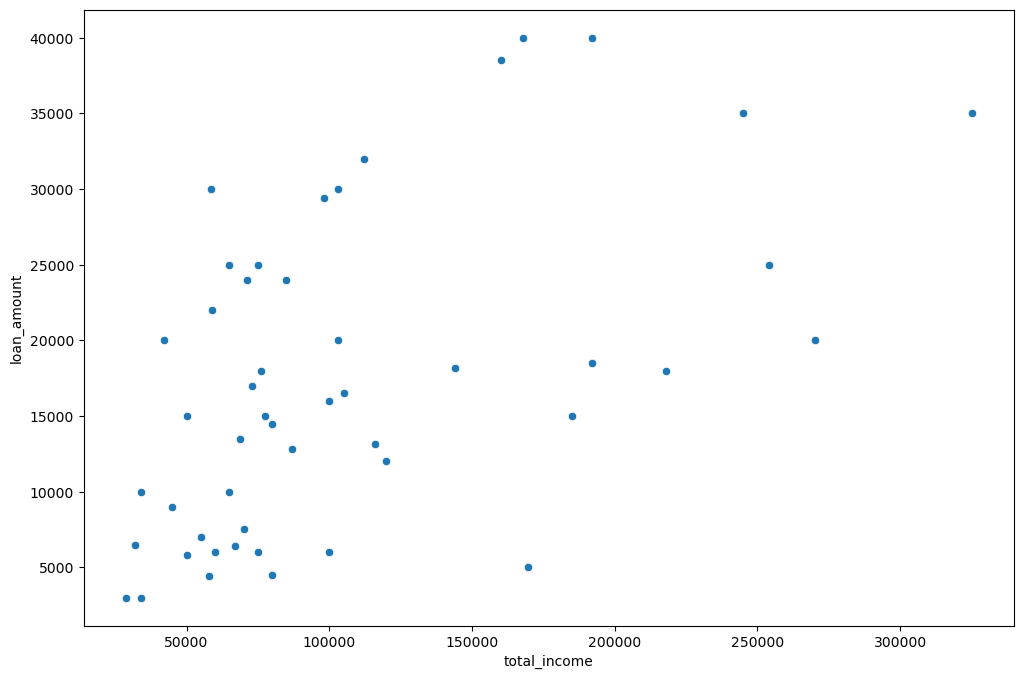

In [4]:
plt.figure(figsize = (12,8))
sns.scatterplot(data=df, x="total_income", y="loan_amount")

In [5]:
mod = sm.ols('loan_amount ~ total_income', data=df)

In [6]:
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     19.26
Date:                Sun, 02 Jul 2023   Prob (F-statistic):           6.23e-05
Time:                        14:26:54   Log-Likelihood:                -524.75
No. Observations:                  50   AIC:                             1054.
Df Residuals:                      48   BIC:                             1057.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     8443.4415   2338.356      3.611   

In [7]:
print(res.params)

Intercept       8443.441475
total_income       0.082109
dtype: float64


In [8]:
b0_val = res.params['Intercept']
print(b0_val)

8443.441475397301


In [9]:
b1_val = res.params['total_income']
print(b1_val)

0.0821090338675512


In [10]:
print("R2: ", res.rsquared)

R2:  0.2863684962462082


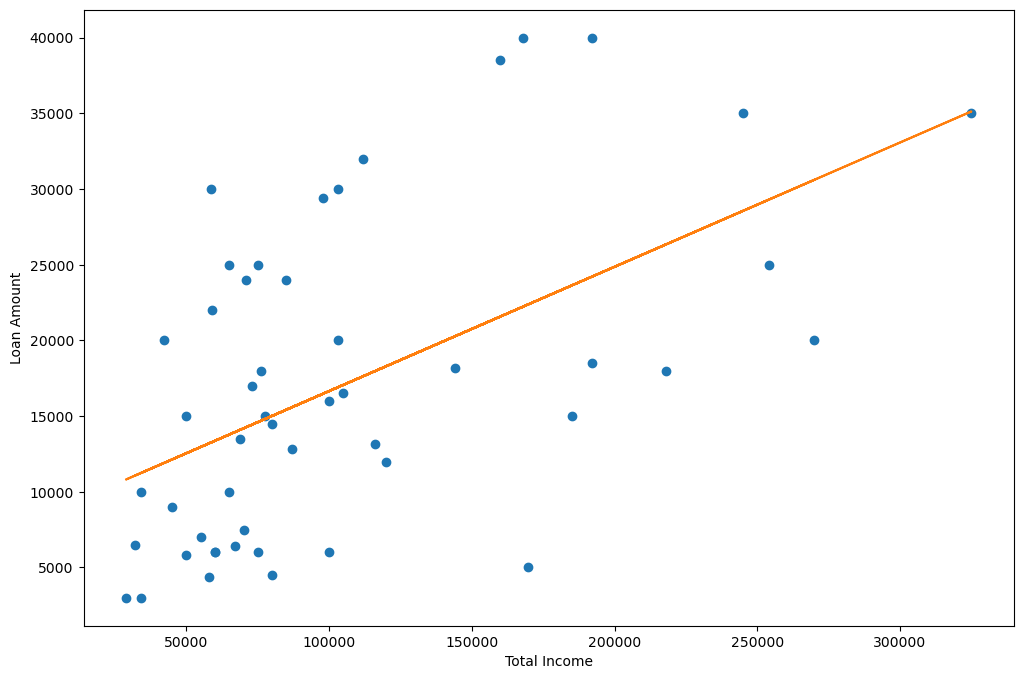

In [11]:
plt.figure(figsize = (12,8))

x = np.array(df['total_income'])
y = np.array(df['loan_amount'])
             
plt.plot(x, y, 'o')

plt.plot(x, b1_val * x + b0_val)

plt.xlabel("Total Income")
plt.ylabel("Loan Amount")

plt.show()